# Stack Overflow Tag Predictor

# Business Problem:

Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.

# Business Objective and Constraints

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

# Machine Learning Problem:

Dataset contains 6,034,195 rows. The columns in the table are:
1. Id - Unique identifier for each question
2. Title - The question's title
3. Body - The body of the question
4. Tags - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')

# Mapping Business problem to Machine Learning Problem:

It is a multi-label classification problem.Performance Metrics:

1. Mean F Score/Micro f1 score :  
 Calculate metrics globally by counting the total true positives, false negatives and false positives.orks good for imbalanced dataset.
2. Macro f1 score :  
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
3. Hamming loss :  
 Loss = (1/|D|)*Sum(xor(x,y)/|L|);where D = Number of datasamples and L is number of labels.This is sort of acuracy.

# Exploratory Data Analysis:

In [3]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt

** Total Number of unique tags:**

In [ ]:
if os.path.isfile('train_no_dup.db'):
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
    con.close()
    tag_data.drop(tag_data.index[0], inplace=True)
    tag_data.head()
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

In [ ]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])
print("Number of unique tags :", tag_dtm.shape[1])
print("Some of the tags we have :", tags[:10])

**Number of times a tag appeared:**

In [ ]:
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [2]:
tag_df = pd.read_csv(r"C:\Users\Friend\AI\AI_datasets\StackOverflow\tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [4]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

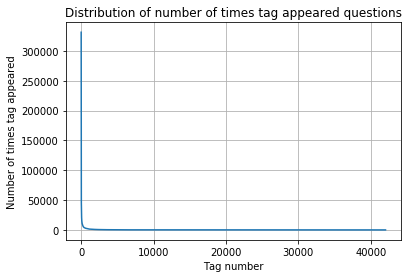

In [5]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

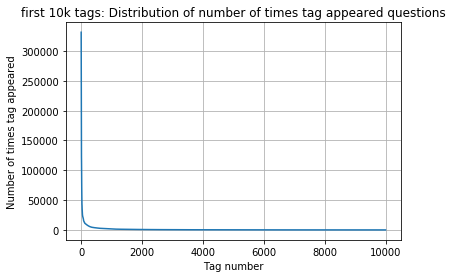

In [7]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

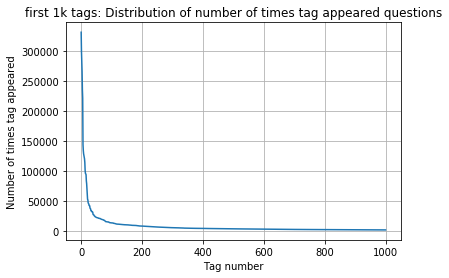

In [8]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

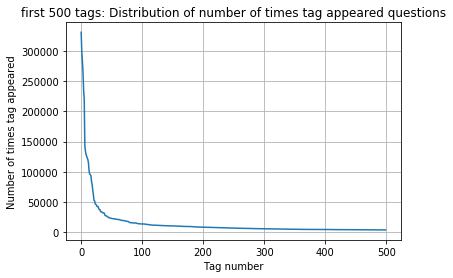

In [9]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

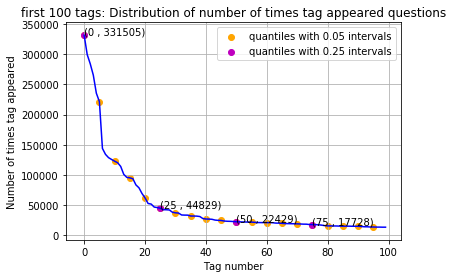

In [10]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()

In [11]:
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

**Tags per question:**

In [ ]:
tag_quest_count = tag_dtm.sum(axis=1).tolist()
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

In [ ]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

**Top 20 tags:**

In [ ]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

# Pre-Process data

<ol> 
    <li> Separate Code from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Give more weightage to title : Add title three times to the question</li>
   
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [ ]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

In [ ]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
train_datasize = 400000
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train LIMIT 500001;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
            
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

# Load Data

In [1]:
import sqlite3
import pandas as pd

conn_r = sqlite3.connect(r'C:\Users\Friend\AI\AI_datasets\StackOverflow\Titlemoreweight.db')
preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.close()

In [2]:
preprocessed_data.shape

(500000, 2)

In [3]:
preprocessed_data.head()

,question,tags
0,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding
1,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding columns
2,java.lang.noclassdeffounderror javax servlet j...,jsp jstl
3,java.sql.sqlexcept microsoft odbc driver manag...,java jdbc
4,better way updat feed fb php sdk better way up...,facebook api facebook-php-sdk


# Converting tags to mulit-labels

In [4]:
from  sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

multilabel_y.shape

(500000, 29587)

In [5]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

multilabel_yx = tags_to_choose(500)
multilabel_yx.shape

(500000, 500)

# Split Data

In [6]:
total_size = 500000
train_datasize = 400000

x_train=preprocessed_data.head(train_datasize)
x_test=preprocessed_data.tail(total_size - train_datasize)

In [7]:
y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:total_size,:]

In [8]:
print(y_train.shape,y_test.shape)

(400000, 500) (100000, 500)


# Featurizations

In [9]:
from  sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(),max_features=100000,binary='true',ngram_range=(1,4))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])

In [10]:
print(x_train_multilabel.shape,x_test_multilabel.shape,y_train.shape,y_test.shape)

(400000, 100000) (100000, 100000) (400000, 500) (100000, 500)


# Machine Learning Models:

**Logistic Regression:**

In [11]:
f1_micro_scores = []
precision_micro_scores = []
recall_micro_scores = []

alphas = [10,1,0.1,0.01,0.001,0.0001]

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score,precision_score,recall_score

for alpha in alphas:
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=alpha, penalty='l1'))
    classifier.fit(x_train_multilabel, y_train)
    
    predictions = classifier.predict (x_test_multilabel)
    
    precision = precision_score(y_test, predictions, average='micro')
    recall = recall_score(y_test, predictions, average='micro')
    f1 = f1_score(y_test, predictions, average='micro')
    
    precision_micro_scores.append(precision)
    recall_micro_scores.append(recall)
    f1_micro_scores.append(f1)

<function matplotlib.pyplot.show(*args, **kw)>

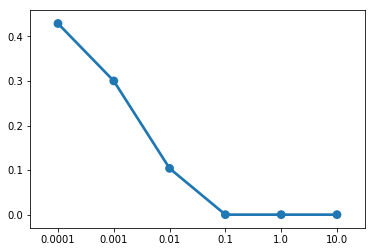

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.pointplot(alphas,f1_micro_scores)
plt.show

In [18]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(x_train_multilabel, y_train)

predictions = classifier.predict (x_test_multilabel)

precision_log = precision_score(y_test, predictions, average='micro')
recall_log = recall_score(y_test, predictions, average='micro')
f1_log = f1_score(y_test, predictions, average='micro')

print(precision_log,recall_log,f1_log)

0.59668035 0.41897331 0.520994953


** Linear-SVM:**

In [20]:
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge',verbose=2,alpha=0.00001, penalty='l1',learning_rate='optimal', eta0=0.1))
classifier.fit(x_train_multilabel, y_train)

predictions = classifier.predict (x_test_multilabel)

precision_svm = precision_score(y_test, predictions, average='micro')
recall_svm = recall_score(y_test, predictions, average='micro')
f1_svm = f1_score(y_test, predictions, average='micro')

print(precision_svm,recall_svm,f1_svm)

0.409867265539611 0.43365820541734745 0.4214272335643379


# Conclusion:

In [15]:
from prettytable import PrettyTable
    
Table = PrettyTable()
Table.field_names  = ["Model","precision","recall","f1-score"]

Table.add_row(["Logistic Regression", precision_log , recall_log  ,f1_log])
Table.add_row(["grid_TF_IDF", precision_svm ,recall_svm , f1_svm])

print(Table)

+---------------------+-------------------+---------------------+--------------------+
|        Model        |     precision     |        recall       |      f1-score      |
+---------------------+-------------------+---------------------+--------------------+
| Logistic Regression |     0.59668035    |      0.41897331     |    0.520994953     |
|     grid_TF_IDF     | 0.409867265539611 | 0.43365820541734745 | 0.4214272335643379 |
+---------------------+-------------------+---------------------+--------------------+


# Summary: